### Problem
Consider the following game. A referee chooses a bitstring `x = x1x2x3` uniformly at random from the set `{001, 010, 100, 111}`. She sends `x1` to Alice, `x2` to Bob and `x3` to Charlie, who cannot communicate. Alice, Bob and Charlie send back responses `a, b, c ∈ {0, 1}` respectively, and they win the game if `a + b + c mod 2 = x1 + x2 + x3 mod 3` (Note that `x1 + x2 + x3 mod 3 ∈ {0, 1}`.)

1. (a) Show that, if Alice, Bob and Charlie adopt a deterministic classical strategy, they win the game with probability at most 3/4.

2. (b) Suppose that Alice, Bob and Charlie share the entangled state `1/2 (|000⟩ - |011⟩ - |101⟩ - |110⟩)`. i.e., Alice holds the first qubit, Bob holds the second qubit, and Charlie the third. Show that Alice, Bob and Charlie have a quantum strategy that wins the game with probability.

### Circuit Design

## Cell Index 5 - Quantum Game Strategy

This cell contains the implementation of a quantum strategy for a game involving Alice, Bob, and Charlie. The game is played with a referee who chooses a random bitstring and sends different bits to each player. The players respond with their own bits, and they win the game if the sum of their bits modulo 2 is equal to the sum of the referee's bits modulo 3.

### Strategy

In this cell, the players adopt a quantum strategy using an entangled state. They share the state `1/2 (|000⟩ - |011⟩ - |101⟩ - |110⟩)`, where Alice holds the first qubit, Bob holds the second qubit, and Charlie holds the third qubit. The strategy involves applying specific quantum operations based on the bits received from the referee.

### Implementation

The implementation starts by creating the entangled state using a quantum circuit. The `create_entangled_state()` function initializes a 3-qubit circuit and applies the necessary gates to create the entangled state.

Next, the `apply_strategy()` function is defined to apply the strategy based on the bits received from the referee. The function applies Hadamard gates to the qubits based on the received bits.

The main part of the implementation is a loop that iterates over different bitstrings chosen by the referee. For each bitstring, the entangled state is created, the strategy is applied, and the qubits are measured. The resulting counts are then checked against the winning condition.

### Results

The results of the game, including the bitstrings, bits received, and measurement counts, are stored in the `results` list.

To run the implementation and see the results, execute the cell below this markdown cell.


In [599]:
from qiskit import QuantumCircuit, transpile, execute
from qiskit.quantum_info import Statevector, entanglement_of_formation
import qiskit


from math import degrees
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [600]:
import os

qiskit_key = os.getenv("QISKIT_KEY")
os.environ["QISKIT_FORCE_THREADS"] = "TRUE"

from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options

service = QiskitRuntimeService(token=qiskit_key, channel="ibm_quantum")

backend = service.get_backend("ibmq_qasm_simulator")
backend.configuration

from qiskit.primitives import Sampler

sampler = Sampler()

In [218]:
from qiskit_aqt_provider import AQTProvider
from qiskit_aqt_provider.primitives import AQTSampler
from qiskit.visualization import plot_distribution, plot_histogram, plot_state_qsphere

# Select an execution backend.
# Any token (even invalid) gives access to the offline simulation backends.
provider = AQTProvider("ACCESS_TOKEN")
backend = provider.get_backend("offline_simulator_no_noise")
backend = provider.get_backend("offline_simulator_noise")

# Instantiate a sampler on the execution backend.
sampler = AQTSampler(backend)

---------------------------------------------------------------------------
Input Bitstring: 001 -> Expected: 1
Incorrect! 00 with value 0.13
Incorrect! 11 with value 0.123
Incorrect! 101 with value 0.115
Incorrect! 110 with value 0.137
Win: 0.495, Loose: 0.505, Pr['win']: 0.495
(Output-> Pr), (00->0.13),  (01->0.136),  (10->0.116),  (11->0.123),  (100->0.121),  (101->0.115),  (110->0.137),  (111->0.122)


<IPython.core.display.Latex object>

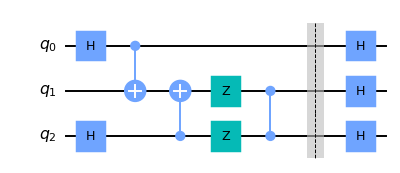

---------------------------------------------------------------------------
Input Bitstring: 010 -> Expected: 1
Incorrect! 00 with value 0.134
Incorrect! 11 with value 0.118
Incorrect! 101 with value 0.122
Incorrect! 110 with value 0.126
Win: 0.5, Loose: 0.5, Pr['win']: 0.5
(Output-> Pr), (00->0.134),  (01->0.127),  (10->0.122),  (11->0.118),  (100->0.117),  (101->0.122),  (110->0.126),  (111->0.134)


<IPython.core.display.Latex object>

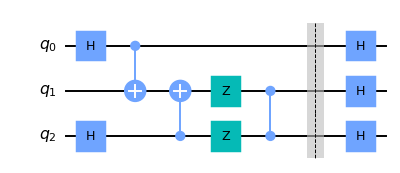

---------------------------------------------------------------------------
Input Bitstring: 100 -> Expected: 1
Incorrect! 00 with value 0.127
Incorrect! 11 with value 0.119
Incorrect! 101 with value 0.132
Incorrect! 110 with value 0.108
Win: 0.514, Loose: 0.486, Pr['win']: 0.514
(Output-> Pr), (00->0.127),  (01->0.144),  (10->0.132),  (11->0.119),  (100->0.111),  (101->0.132),  (110->0.108),  (111->0.127)


<IPython.core.display.Latex object>

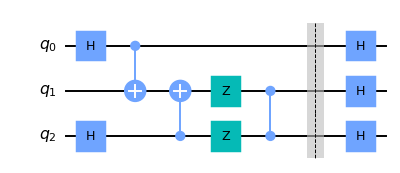

---------------------------------------------------------------------------
Input Bitstring: 111 -> Expected: 0
Incorrect! 01 with value 0.105
Incorrect! 10 with value 0.13
Incorrect! 100 with value 0.123
Incorrect! 111 with value 0.126
Win: 0.516, Loose: 0.484, Pr['win']: 0.516
(Output-> Pr), (00->0.132),  (01->0.105),  (10->0.13),  (11->0.128),  (100->0.123),  (101->0.117),  (110->0.139),  (111->0.126)


<IPython.core.display.Latex object>

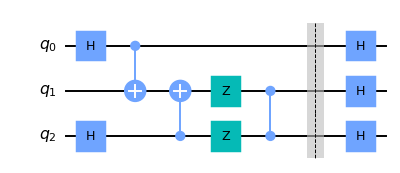

In [603]:
# Consider the following game. A referee chooses a bitstring x = x1x2x3 uniformly at random from the
# set {001, 010, 100, 111}. She sends x1 to Alice, x2 to Bob and x3 to Charlie, who cannot communicate.
# Alice, Bob and Charlie send back responses a, b, c ∈ {0, 1} respectively, and they win the game if
# a + b + c mod 2 = x1 + x2 + x3 mod 3
# (Note that x1 + x2 + x3 mod 3 ∈ {0, 1}.)

# (b) Suppose that Alice, Bob and Charlie share the entangled state `1/2 (|000⟩ - |011⟩ - |101⟩ - |110⟩)`.
# i.e., Alice holds the first qubit, Bob holds the second qubit, and Charlie the third. Show that Alice,
# Bob and Charlie have a quantum strategy that wins the game with probability.


def create_entangled_state():
    # Initialize the circuit with 3 qubits
    qc = QuantumCircuit(3)

    # Step 1: Create the initial superposition
    qc.h(0)  # Apply Hadamard on qubit 0 to create superposition
    qc.cx(0, 1)  # Entangle qubit 0 and 1 to get |000> + |011>

    # Step 2: Entangle additional qubits to expand the state
    # Apply a Hadamard gate to qubit 2 to prepare for entanglement
    qc.h(2)

    # Use a CNOT gate to entangle qubit 2 with the rest, ensuring the operation expands the superposition
    qc.cx(2, 1)  # This choice depends on the specific entanglement strategy

    # Step 3: Introduce negative phases
    # Apply Z gates to flip the phase of selected states
    qc.z(1)
    qc.z(2)

    qc.cz(1, 2)
    qc.barrier()
    return qc


# # Define the measurement strategy
def apply_strategy(qc, bits_received):
    for i, bit in enumerate(bits_received):
        if bit == "0":
            qc.h(i)


# Define the measurement strategy
def apply_strategy(qc, bits_received):
    for i, bit in enumerate(bits_received):
        if bit == "0" and i != 2:
            qc.h(i)
        else:
            ...
            qc.h(i)


def sum_bits(bits):
    return sum([int(bit) for bit in bits])


# Define the winning condition check
def check_winning_condition(bits_received, counts):

    sum_exp = sum_bits(bits_received) % 3

    counts_exp = {"win": 0, "loose": 0}
    for key, value in counts.items():
        sum_key = sum_bits(key) % 2
        if sum_key % 2 == sum_exp % 3:
            counts_exp["win"] += value
        else:
            print(f"Incorrect! {key} with value {value}")
            counts_exp["loose"] += value
    print(
        f"Win: {counts_exp['win']}, Loose: {counts_exp['loose']}, Pr['win']: {counts_exp['win'] / (counts_exp['win'] + counts_exp['loose'])}"
    )


# Initialize the sampler
sampler = Sampler()

# Define the possible bitstrings
bitstrings = ["001", "010", "100", "111"]

# Initialize results list
results = []

# Iterate over the bitstrings
for bitstring in bitstrings:
    print("-" * 75)
    # Split the bitstring into bits for Alice, Bob, and Charlie
    bits_received = [bit for bit in bitstring]

    # Create the entangled state and apply the strategy
    qc = create_entangled_state()
    apply_strategy(qc, bits_received)

    # Measure all qubits in the circuit
    qc.measure_all()

    # Execute the circuit
    job = sampler.run(qc, shots=1000)
    result = job.result()

    # Get the counts of the measurement results
    counts = {f"{b:02b}": p for b, p in result.quasi_dists[0].items()}

    # Append the result to the results list
    results.append([result, bitstring, bits_received, counts])

    # Check the winning condition
    expected = sum([int(bit) for bit in bits_received]) % 3
    print(f"Input Bitstring: {bitstring} -> Expected: {expected}")
    check_winning_condition(bits_received, counts)
    print(
        "(Output-> Pr),",
        ",  ".join(
            ["(" + key + "->" + str(value) + ")" for key, value in counts.items()]
        ),
    )

    qc.remove_final_measurements()  # no measurements allowed
    from qiskit.quantum_info import Statevector

    statevector = Statevector(qc)
    display(statevector.draw("latex", prefix="Statevector Post:"))
    display(qc.draw("mpl", scale=0.7))

In [ ]:
# Python

# Import necessary libraries
import qiskit
from qiskit.visualization import display

# Initialize the sampler
sampler = Sampler()

# Define the possible bitstrings
bitstrings = ["001", "010", "100", "111"]

# Initialize results list
results = []

# Iterate over the bitstrings
for bitstring in bitstrings:
    # Split the bitstring into bits for Alice, Bob, and Charlie
    bits_received = [bit for bit in bitstring]

    # Create the entangled state and apply the strategy
    qc = create_entangled_state()
    apply_strategy(qc, bits_received)

    # Convert the circuit to a statevector
    stv1 = qiskit.quantum_info.Statevector.from_instruction(qc)

    # Measure all qubits in the circuit
    qc.measure_all()

    # Execute the circuit
    job = sampler.run(qc, shots=1000)
    result = job.result()

    # Get the counts of the measurement results
    counts = {f"{b:02b}": p for b, p in result.quasi_dists[0].items()}

    # Append the result to the results list
    results.append([result, bitstring, bits_received, counts])

    # Check the winning condition
    expected = sum([int(bit) for bit in bits_received]) % 3
    check_winning_condition(bits_received, counts)

In [520]:
result

SamplerResult(quasi_dists=[{0: 0.243, 3: 0.256, 5: 0.251, 6: 0.25}], metadata=[{'shots': 1000}])

<IPython.core.display.Latex object>

['1', '0', '0']
1
<class 'str'>
0
<class 'str'>
0
<class 'str'>


<IPython.core.display.Latex object>

/var/folders/l3/3msj1f8x6v930zvr96b6w9bh0000gn/T/ipykernel_57698/3332134835.py:33: DeprecationWarning: The function ``qiskit.execute_function.execute()`` is deprecated as of qiskit 0.46.0. It will be removed in the Qiskit 1.0 release. This function combines ``transpile`` and ``backend.run``, which is covered by ``Sampler`` :mod:`~qiskit.primitives`. Alternatively, you can also run :func:`.transpile` followed by ``backend.run()``.
  job = execute(qc, backend, shots=200)
100%|██████████| 1/1 [00:00<00:00, 487.03it/s]

110 2
000 1
011 1


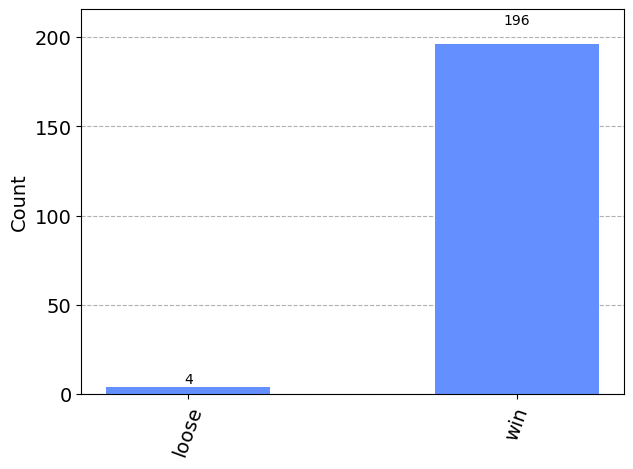

{'100': 49, '001': 52, '110': 2, '000': 1, '010': 42, '011': 1, '111': 53}


In [501]:
bitstring = "100"
bits_received = [bit for bit in bitstring]


# execute the circuit with the bitstring as input
qc = create_entangled_state()

stv1 = qiskit.quantum_info.Statevector.from_instruction(qc)
display(stv1.draw("latex", prefix="Statevector1:"))
print(bits_received)


for i, bit in enumerate(bits_received):
    if bit == "0":
        # print('applying nothing')
        qc.h(i)
    # elif bit == '11':
    #     qc.h(i)  # Measure in Hadamard basis (apply H before measurement for basis change)
    #     pass  # Measure in computational basis (no change needed)


stv2 = qiskit.quantum_info.Statevector.from_instruction(qc)
display(stv2.draw("latex", prefix="Statevector2:"))

qc.measure_all()

job = execute(qc, backend, shots=200)
result = job.result()
counts = result.get_counts(qc)

sum_exp = sum([int(bit) for bit in bits_received])

counts_exp = {"win": 0, "loose": 0}
for key, value in counts.items():
    sum_key = sum([int(k) for k in key])
    if sum_key % 2 == sum_exp % 3:
        counts_exp["win"] += value
    else:
        print(key, value)
        counts_exp["loose"] += value


display(plot_histogram(counts_exp))

# Print the result
print(counts)

In [480]:
1 % 2, 3 % 2, 1 % 3

(1, 1, 1)

In [216]:
counts

{'000': 23,
 '010': 23,
 '110': 23,
 '001': 19,
 '100': 32,
 '101': 33,
 '011': 22,
 '111': 25}

In [ ]:
results
for result, bitstring, bits_received, counts in results:

    print()
    print(results)
    print(f"For bitstring: {bitstring}:  {bits_received}:")
    print(counts)


[[SamplerResult(quasi_dists=[{1: 0.4, 6: 0.6}], metadata=[{'shots': 100}]), '001', ['00', '1'], {'01': 0.4, '110': 0.6}], [SamplerResult(quasi_dists=[{1: 0.41, 6: 0.59}], metadata=[{'shots': 100}]), '010', ['01', '0'], {'01': 0.41, '110': 0.59}], [SamplerResult(quasi_dists=[{1: 0.54, 6: 0.46}], metadata=[{'shots': 100}]), '100', ['10', '0'], {'01': 0.54, '110': 0.46}], [SamplerResult(quasi_dists=[{0: 0.28, 1: 0.29, 6: 0.26, 7: 0.17}], metadata=[{'shots': 100}]), '111', ['11', '1'], {'00': 0.28, '01': 0.29, '110': 0.26, '111': 0.17}]]
For bitstring: 001:  ['00', '1']:
{'01': 0.4, '110': 0.6}

[[SamplerResult(quasi_dists=[{1: 0.4, 6: 0.6}], metadata=[{'shots': 100}]), '001', ['00', '1'], {'01': 0.4, '110': 0.6}], [SamplerResult(quasi_dists=[{1: 0.41, 6: 0.59}], metadata=[{'shots': 100}]), '010', ['01', '0'], {'01': 0.41, '110': 0.59}], [SamplerResult(quasi_dists=[{1: 0.54, 6: 0.46}], metadata=[{'shots': 100}]), '100', ['10', '0'], {'01': 0.54, '110': 0.46}], [SamplerResult(quasi_dists=[

In [ ]:
# Test the strategy
bits_received = ["00", "11", "00"]  # Example bits received by Alice, Bob, and Charlie
qc = create_entangled_state()
apply_strategy(qc, bits_received)

# Execute the circuit

job = execute(qc, backend, shots=100)
result = job.result()
counts = result.get_counts(qc)
print(counts)

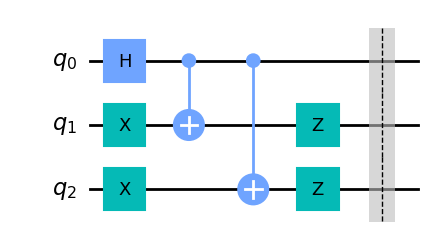

<IPython.core.display.Latex object>

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j, 0.        +0.j],
            dims=(2, 2, 2))


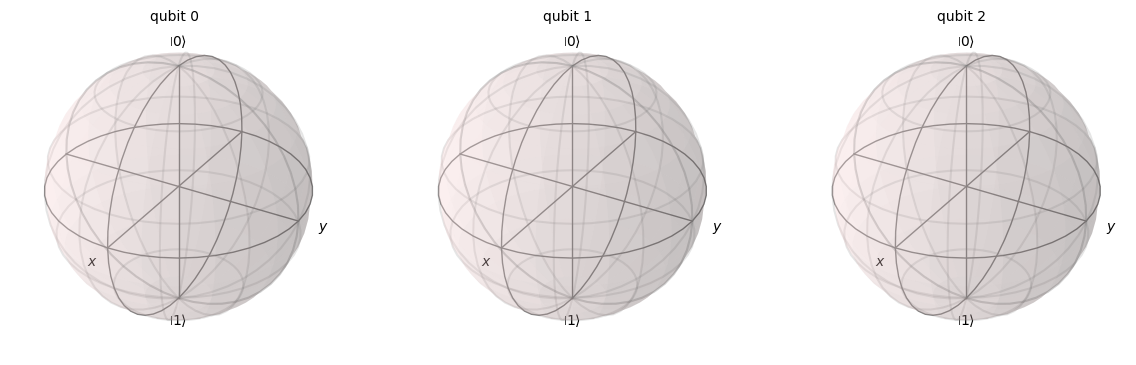

In [93]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector


# state = Statevector(result)
# plot_bloch_multivector(state)


# Define the entangled state given in the problem
def create_entangled_state():
    qc = QuantumCircuit(3)

    # Apply gates to generate the specific entangled state: 1/2(|000⟩ - |011⟩ - |101⟩ - |110⟩)
    qc.x([1, 2])
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.z([1, 2])
    qc.barrier()

    return qc


st = create_entangled_state()
# st.measure_all()
display(st.draw())
stv1 = qiskit.quantum_info.Statevector.from_instruction(st)
result = transpile(st, backend)
# state = Statevector(result)

# qc.measure_all()
display(stv1.draw("latex", prefix="Statevector1:"))
print(stv1)
display(plot_bloch_multivector(stv1))

In [202]:
# Create a quantum circuit with 3 qubits
qc = QuantumCircuit(3)


# Apply a Hadamard gate to the first qubit
qc.h(0)
# qc.h(1)
qc.cx(0, 2)


# Apply CNOT gates to create entanglement
qc.cx(0, 1)
# qc.cx(0, 2)
qc.h(2)

# Apply Z gate to introduce negative phase where needed
qc.z(1)
qc.z(2)
# qc.z(2)

# qc.h(0)


# Apply a CZ gate between qubit 1 and 2
qc.cz(1, 2)
qc.cz(0, 2)
qc.cx(1, 0)
# qc.cz(0, 2 )


# qc.rz(theta, 1)
# Apply a CZ gate between qubit 1 and 2
qc.cz(0, 1)
# Note: Depending on your circuit's current state, you may need to adjust which qubits the CZ gate is applied to.
qc.cx(1, 0)
qc.cx(0, 1)


st = qc
# display(st.draw())
stv1 = qiskit.quantum_info.Statevector.from_instruction(st)

display(stv1.draw("latex", prefix="Statevector1:"))

<IPython.core.display.Latex object>

In [209]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
import numpy as np

# Initialize the circuit with 3 qubits
qc = QuantumCircuit(3)

# Step 1: Create the initial superposition
qc.h(0)  # Apply Hadamard on qubit 0 to create superposition
qc.cx(0, 1)  # Entangle qubit 0 and 1 to get |000> + |011>

# Step 2: Entangle additional qubits to expand the state
# Apply a Hadamard gate to qubit 2 to prepare for entanglement
qc.h(2)

# Use a CNOT gate to entangle qubit 2 with the rest, ensuring the operation expands the superposition
qc.cx(2, 1)  # This choice depends on the specific entanglement strategy

# Step 3: Introduce negative phases
# Apply Z gates to flip the phase of selected states
qc.z(1)
qc.z(2)

qc.cz(1, 2)
# Optionally, use controlled phase gates to adjust the phase of specific components

# View the circuit
print(qc.draw())

# Simulate the circuit to verify the state
state = Statevector.from_instruction(qc)
display(state.draw("latex", prefix="Statevector1:"))

Figure(538.33x284.278)


<IPython.core.display.Latex object>

In [ ]:
# Correct way to create the specified entangled state
def create_entangled_state():
    qc = QuantumCircuit(3)
    # Apply gates to generate the entangled state |Ψ⟩ = 1/2 (|000⟩ - |011⟩ - |101⟩ - |110⟩)
    qc.h(0)
    qc.cx(0, 1)
    qc.cx(0, 2)
    qc.x(1)
    qc.x(2)
    qc.z(1)
    qc.z(2)
    return qc


st = create_entangled_state()
st.measure_all()
display(st.draw())
result = transpile(st, backend)

# state = Statevector(result)
# print(state)
# plot_bloch_multivector(state)

In [51]:
from qiskit.quantum_info import Statevector
import numpy as np

sv = Statevector(
    [1 / np.sqrt(2), 0, 1 / np.sqrt(2), 0, 1 / np.sqrt(2), 0, 1 / np.sqrt(2), 1]
)
sv.draw(output="latex")

<IPython.core.display.Latex object>

In [86]:
sv = Statevector(
    [
        000,
        1,
        1,
        0,
    ]
)
sv.draw(output="latex")

<IPython.core.display.Latex object>